In [1]:
import pandas as pd
import json
from shapely.geometry import shape
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [44]:
# Configure visualization settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Data Exploration: Milan Telecom CDR Dataset

This notebook explores the Milan Call Detail Records (CDR) dataset, which includes:
- **SMS/Call/Internet Data**: Communication metrics by cell and country
- **Province Data**: Cell-to-province mappings across Italy
- **Census Data**: ISTAT demographic variables from 2011

---

## Data Loading

In [45]:
# Configure data directory and organize files by type
data_dir = '../data_milan_cdr_kaggle'

sms_files = sorted([f for f in os.listdir(data_dir) if f.startswith('sms-call-internet')])
province_files = sorted([f for f in os.listdir(data_dir) if f.startswith('mi-to-provinces')])
census_file = 'ISTAT_census_variables_2011.csv'

print(f"SMS/Call/Internet files: {len(sms_files)}")
print(f"Province files: {len(province_files)}")
print(f"Census file: {census_file}")

SMS/Call/Internet files: 7
Province files: 7
Census file: ISTAT_census_variables_2011.csv


---

## 1. SMS/Call/Internet Data

Communication metrics including SMS, calls, and internet usage by cell location and country code.

In [46]:
# Load and display SMS/Call/Internet data
sms_df = pd.read_csv(os.path.join(data_dir, sms_files[0]))

print("=" * 60)
print(f"SMS/CALL/INTERNET DATA - Sample: {sms_files[0]}")
print("=" * 60)
print(f"\nShape: {sms_df.shape}")
print(f"\nColumn Names and Types:\n{sms_df.dtypes}")
print(f"\nMissing Values:\n{sms_df.isnull().sum()}")
print(f"\nFirst 5 rows:")
print(sms_df.head())
print(f"\nBasic Statistics:")
print(sms_df.describe())

SMS/CALL/INTERNET DATA - Sample: sms-call-internet-mi-2013-11-01.csv

Shape: (1891928, 8)

Column Names and Types:
datetime        object
CellID           int64
countrycode      int64
smsin          float64
smsout         float64
callin         float64
callout        float64
internet       float64
dtype: object

Missing Values:
datetime             0
CellID               0
countrycode          0
smsin          1086153
smsout         1422446
callin         1407781
callout        1037413
internet       1087074
dtype: int64

First 5 rows:
              datetime  CellID  countrycode   smsin  smsout  callin  callout  \
0  2013-11-01 00:00:00       1            0  0.3521     NaN     NaN   0.0273   
1  2013-11-01 00:00:00       1           33     NaN     NaN     NaN      NaN   
2  2013-11-01 00:00:00       1           39  1.7322  1.1047  0.5919   0.4020   
3  2013-11-01 00:00:00       2            0  0.3581     NaN     NaN   0.0273   
4  2013-11-01 00:00:00       2           33     NaN     Na

In [47]:
# Load and display Province data
province_df = pd.read_csv(os.path.join(data_dir, province_files[0]))

print("=" * 60)
print(f"PROVINCE DATA - Sample: {province_files[0]}")
print("=" * 60)
print(f"\nShape: {province_df.shape}")
print(f"\nColumn Names and Types:\n{province_df.dtypes}")
print(f"\nMissing Values:\n{province_df.isnull().sum()}")
print(f"\nFirst 5 rows:")
print(province_df.head())
print(f"\nBasic Statistics:")
print(province_df.describe())

PROVINCE DATA - Sample: mi-to-provinces-2013-11-01.csv

Shape: (2307306, 5)

Column Names and Types:
datetime          object
CellID             int64
provinceName      object
cell2Province    float64
Province2cell    float64
dtype: object

Missing Values:
datetime              0
CellID                0
provinceName          0
cell2Province    899375
Province2cell    859676
dtype: int64

First 5 rows:
              datetime  CellID provinceName  cell2Province  Province2cell
0  2013-11-01 00:00:00       1       MILANO         0.1894         0.0541
1  2013-11-01 00:00:00       1        PAVIA         0.0273            NaN
2  2013-11-01 00:00:00       1       TRENTO         0.0261            NaN
3  2013-11-01 00:00:00       2       MILANO         0.1922         0.0556
4  2013-11-01 00:00:00       2        PAVIA         0.0273            NaN

Basic Statistics:
             CellID  cell2Province  Province2cell
count  2.307306e+06   1.407931e+06   1.447630e+06
mean   5.142692e+03   6.463123e-

## 2. Province Data

Cell-to-province mapping showing communication flows between cellular grid cells and Italian provinces.

In [48]:
# Load and display Census data
census_df = pd.read_csv(os.path.join(data_dir, census_file))

print("=" * 60)
print(f"CENSUS DATA - {census_file}")
print("=" * 60)
print(f"\nShape: {census_df.shape}")
print(f"\nColumn Names and Types:\n{census_df.dtypes}")
print(f"\nMissing Values:\n{census_df.isnull().sum()}")
print(f"\nFirst 5 rows:")
print(census_df.head())
print(f"\nBasic Statistics:")
print(census_df.describe())

CENSUS DATA - ISTAT_census_variables_2011.csv

Shape: (110, 135)

Column Names and Types:
PROVINCIA    object
P1            int64
P2            int64
P3            int64
P4            int64
              ...  
E23           int64
E24           int64
E25           int64
E26           int64
E27           int64
Length: 135, dtype: object

Missing Values:
PROVINCIA    0
P1           0
P2           0
P3           0
P4           0
            ..
E23          0
E24          0
E25          0
E26          0
E27          0
Length: 135, dtype: int64

First 5 rows:
     PROVINCIA      P1      P2      P3      P4      P5     P6     P7     P8  \
0  Alessandria  427229  204983  222246  158222  198253  11481  44582  14691   
1         Asti  217573  105370  112203   82119  102538   5404  20767   6745   
2       Biella  182192   86821   95371   69188   82431   5266  18474   6833   
3        Cuneo  586378  287786  298592  231452  276983  12473  49417  16053   
4       Novara  365559  176361  189198  14330

## 3. Census Data

ISTAT demographic variables from the 2011 census with 110 records across various provinces.

---

## Data Visualizations

### SMS/Call/Internet Data - Distribution Analysis

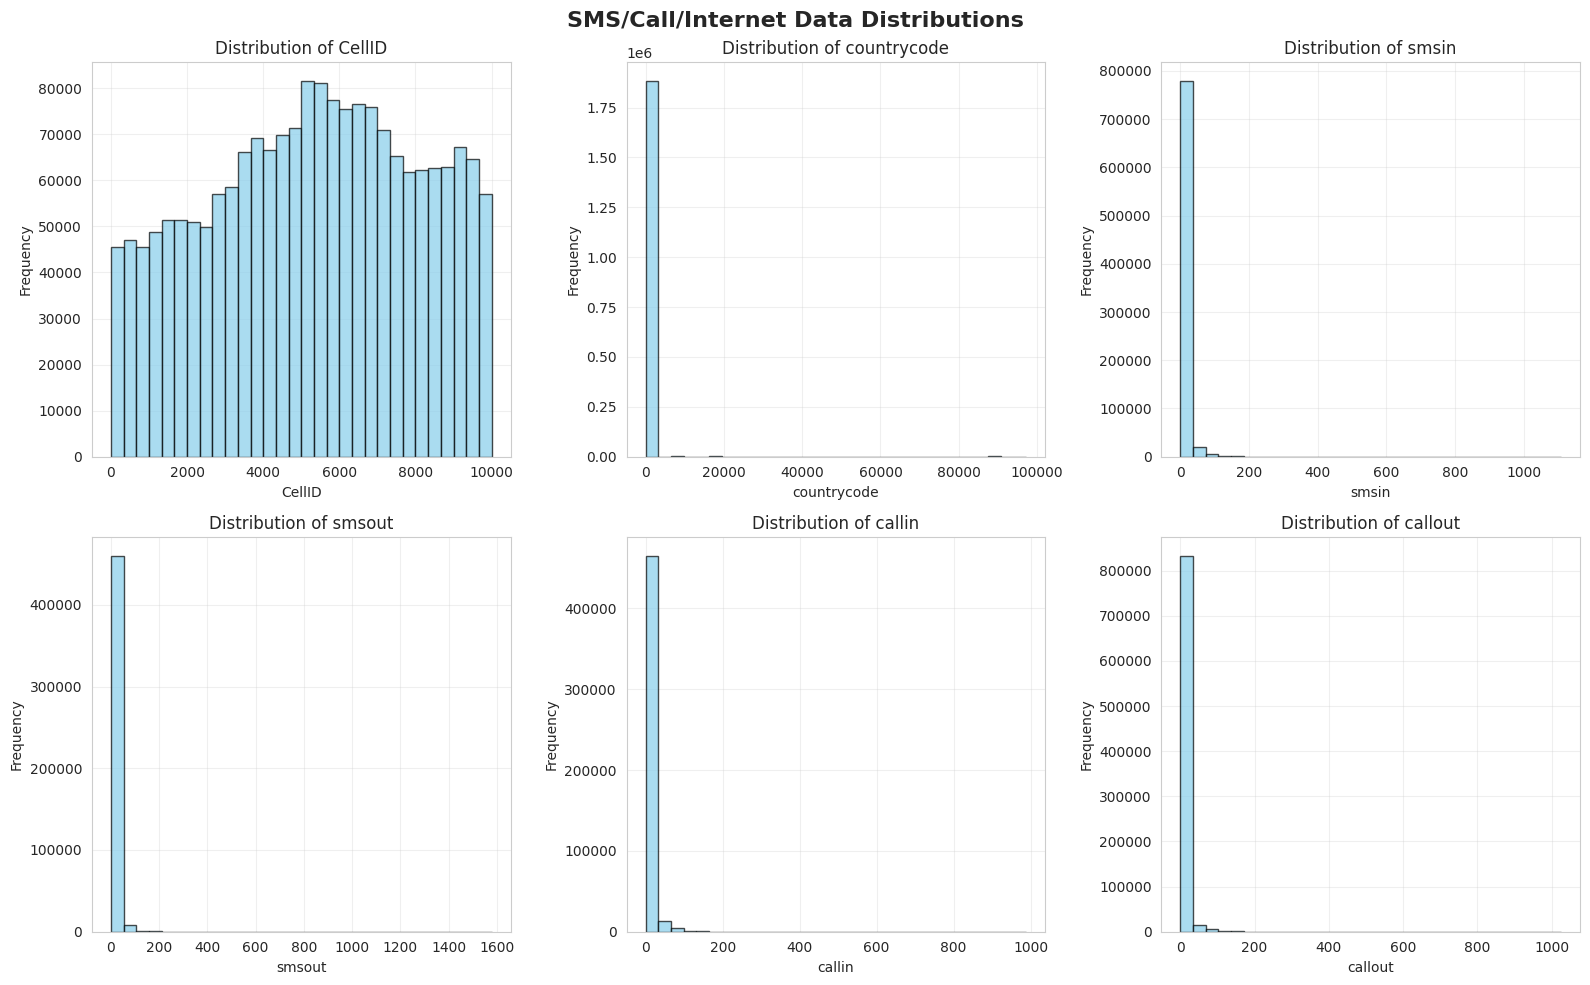

In [49]:
# Visualize SMS/Call/Internet data distributions
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('SMS/Call/Internet Data Distributions', fontsize=16, fontweight='bold')

numeric_cols = sms_df.select_dtypes(include=[np.number]).columns
for idx, col in enumerate(numeric_cols[:6]):
    row = idx // 3
    col_idx = idx % 3
    axes[row, col_idx].hist(sms_df[col].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

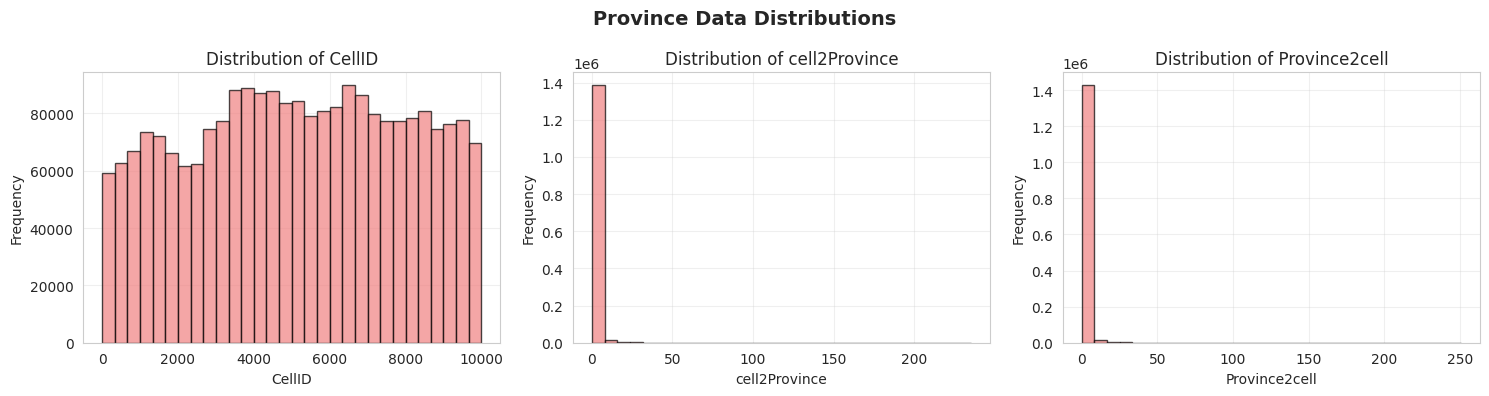


Unique Provinces:
provinceName
MILANO                   226487
MONZA E DELLA BRIANZA    108904
PAVIA                    107362
NAPOLI                    79804
BERGAMO                   79295
                          ...  
ORISTANO                   2103
NUORO                      2039
CARBONIA-IGLESIAS          1962
OGLIASTRA                  1035
MEDIO CAMPIDANO             637
Name: count, Length: 110, dtype: int64


In [50]:
# Visualize Province data distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Province Data Distributions', fontsize=14, fontweight='bold')

numeric_cols = province_df.select_dtypes(include=[np.number]).columns
for idx, col in enumerate(numeric_cols):
    axes[idx].hist(province_df[col].dropna(), bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Display province distribution
print("\nUnique Provinces:")
print(province_df['provinceName'].value_counts())

### Province Data - Distribution Analysis

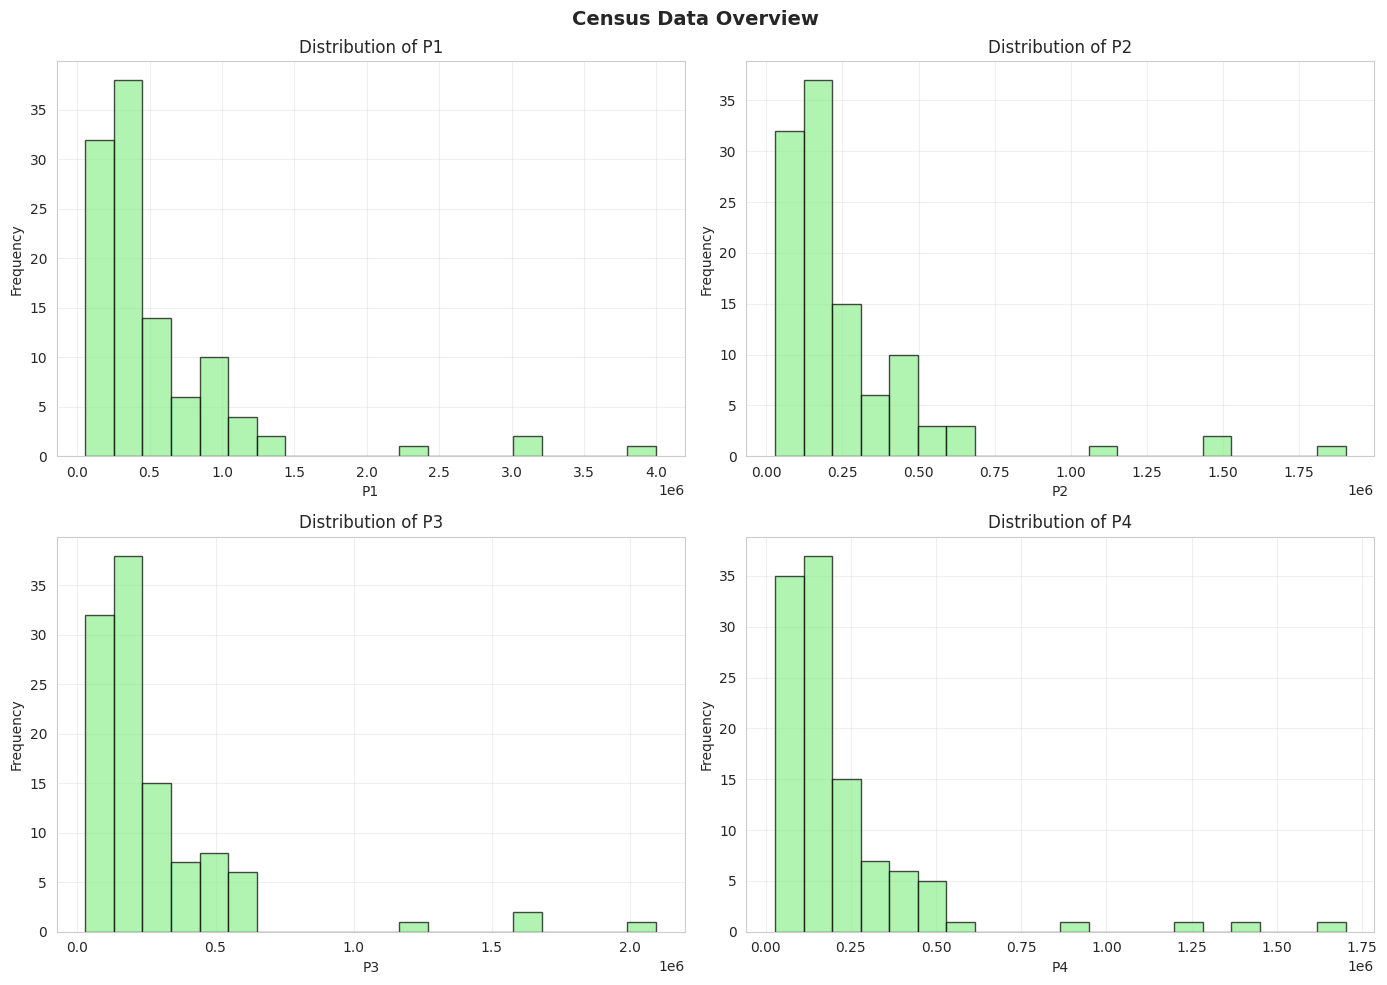


Census columns: ['PROVINCIA', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40', 'P41', 'P42', 'P43', 'P44', 'P45', 'P46', 'P47', 'P48', 'P49', 'P50', 'P51', 'P52', 'P53', 'P54', 'P55', 'P56', 'P57', 'P58', 'P59', 'P60', 'P61', 'P62', 'P64', 'P65', 'P66', 'P128', 'P129', 'P130', 'P131', 'P132', 'P135', 'P136', 'P137', 'P138', 'P139', 'P140', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'A2', 'A3', 'A5', 'A44', 'A46', 'A47', 'A48', 'PF1', 'PF2', 'PF3', 'PF4', 'PF5', 'PF6', 'PF7', 'PF8', 'PF9', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27']


In [51]:
# Visualize Census data distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Census Data Overview', fontsize=14, fontweight='bold')

# Get numeric columns
numeric_cols = census_df.select_dtypes(include=[np.number]).columns

# Plot numeric columns
for idx, col in enumerate(numeric_cols[:4] if len(numeric_cols) >= 4 else numeric_cols):
    row = idx // 2
    col_idx = idx % 2
    if len(numeric_cols) > 0:
        axes[row, col_idx].hist(census_df[col].dropna(), bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
        axes[row, col_idx].set_title(f'Distribution of {col}')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Frequency')
        axes[row, col_idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nCensus columns: {census_df.columns.tolist()}")

### Census Data - Distribution Analysis

---

## 4. Spatial Data (GeoJSON)

Geographic data including the Milano cellular grid and Italian provinces boundaries.

In [ ]:

# Path to your geojson file
gridfile = os.path.join(data_dir, 'milano-grid.geojson')
milanogrid_sample = gpd.read_file(gridfile)

print(f"Loading {gridfile}...")
    
# Load the full JSON content
with open(gridfile, 'r') as f:
    griddata = json.load(f)

# Extract the list of features (~10,000 cells)
gridfeatures = griddata['features']

print(f"Successfully loaded {len(gridfeatures)} grid cells.")
print("Structure sample first cell properties:")
gridfeatures[0]['properties']


Loading ../data_milan_cdr_kaggle/milano-grid.geojson...
Successfully loaded 10000 grid cells.
Structure sample first cell properties:


{'cellId': 1}

In [53]:
def process_milano_grid_batch(batch_id, batch_size=1000):
    """
    Processes a specific batch of the Milano Grid to avoid memory overload.
    
    Args:
        batch_id (int): The batch number (1 to 10 for a 10k dataset).
        batch_size (int): Number of cells per batch (default 1000).
    
    Returns:
        pd.DataFrame: A DataFrame containing CellID and Geometry for the batch.
    """
    # Calculate start and end indices
    start_idx = (batch_id - 1) * batch_size
    end_idx = start_idx + batch_size
    
    # Check if batch is out of range
    if start_idx >= len(gridfeatures):
        return None
    
    # Slice the features list
    current_batch = gridfeatures[start_idx:end_idx]
    
    # Extract data into a list of dictionaries
    batch_data = []
    for feature in current_batch:
        cell_id = feature['properties']['cellId']
        # Convert GeoJSON geometry to a Shapely object for analysis
        geometry = shape(feature['geometry'])
        
        batch_data.append({
            'CellID': cell_id,
            'geometry': geometry
            # Add other properties here if needed, e.g., cell2Province
        })
    
    # Create DataFrame
    df_batch = pd.DataFrame(batch_data)
    
    print(f"Batch {batch_id} processed: {len(df_batch)} cells (IDs {start_idx+1} to {min(end_idx, len(gridfeatures))})")
    return df_batch


In [54]:
### --- Workflow Implementation ---

batch1_df = process_milano_grid_batch(1)

# Display the result
print("1. Data Sample:")
print(batch1_df.head())

print("Type Check:")
print(batch1_df.geometry.iloc[0])



Batch 1 processed: 1000 cells (IDs 1 to 1000)
1. Data Sample:
   CellID                                           geometry
0       1  POLYGON ((9.0114910478323 45.35880131440966, 9...
1       2  POLYGON ((9.014491488013135 45.35880097314403,...
2       3  POLYGON ((9.017491928134044 45.358800553060284...
3       4  POLYGON ((9.02049236818262 45.35880005415845, ...
4       5  POLYGON ((9.023492808146456 45.35879947643852,...
Type Check:
POLYGON ((9.0114910478323 45.35880131440966, 9.014491488013135 45.35880097314403, 9.0144909480813 45.35668565341486, 9.011490619692509 45.356685994655464, 9.0114910478323 45.35880131440966))


In [ ]:

# Load Italian provinces GeoJSON
provinces_path = os.path.join(data_dir, 'Italian_provinces.geojson')
provinces_gdf = gpd.read_file(provinces_path)

print("="*60)
print("ITALIAN PROVINCES GEOJSON")
print("="*60)
print(f"Shape: {provinces_gdf.shape}")
print(f"Names and Types:\n{provinces_gdf.dtypes}")
print(f"Missing Values:\n{provinces_gdf.isnull().sum()}")
print("First 5 rows:")
print(provinces_gdf.head())
print(f"Geometry Type: {provinces_gdf.geometry.type.unique()}")
print(f"CRS: {provinces_gdf.crs}")
print(f"Total Bounds: {provinces_gdf.total_bounds}")
print(f"# of provinces: {len(provinces_gdf)}")


ITALIAN PROVINCES GEOJSON
Shape: (110, 4)
Names and Types:
PROVINCIA       object
SIGLA           object
SHAPE_AREA     float64
geometry      geometry
dtype: object
Missing Values:
PROVINCIA     0
SIGLA         0
SHAPE_AREA    0
geometry      0
dtype: int64
First 5 rows:
     PROVINCIA SIGLA    SHAPE_AREA  \
0       Novara    NO  1.341339e+09   
1       Torino    TO  6.828303e+09   
2     Vercelli    VC  2.082343e+09   
3        Aosta    AO  3.258955e+09   
4  Alessandria    AL  3.560360e+09   

                                            geometry  
0  MULTIPOLYGON (((460929.541 5076320.297, 461165...  
1  MULTIPOLYGON (((411015.005 5049970.983, 411266...  
2  MULTIPOLYGON (((438328.611 5087208.214, 439028...  
3  MULTIPOLYGON (((390652.643 5091766.17, 390748....  
4  MULTIPOLYGON (((453307.918 5005504.322, 454248...  
Geometry Type: ['MultiPolygon']
CRS: EPSG:32632
Total Bounds: [ 313279.25136057 3933846.21563078 1312016.15064164 5220292.29224205]
# of provinces: 110


### Spatial Data - Geographic Visualizations

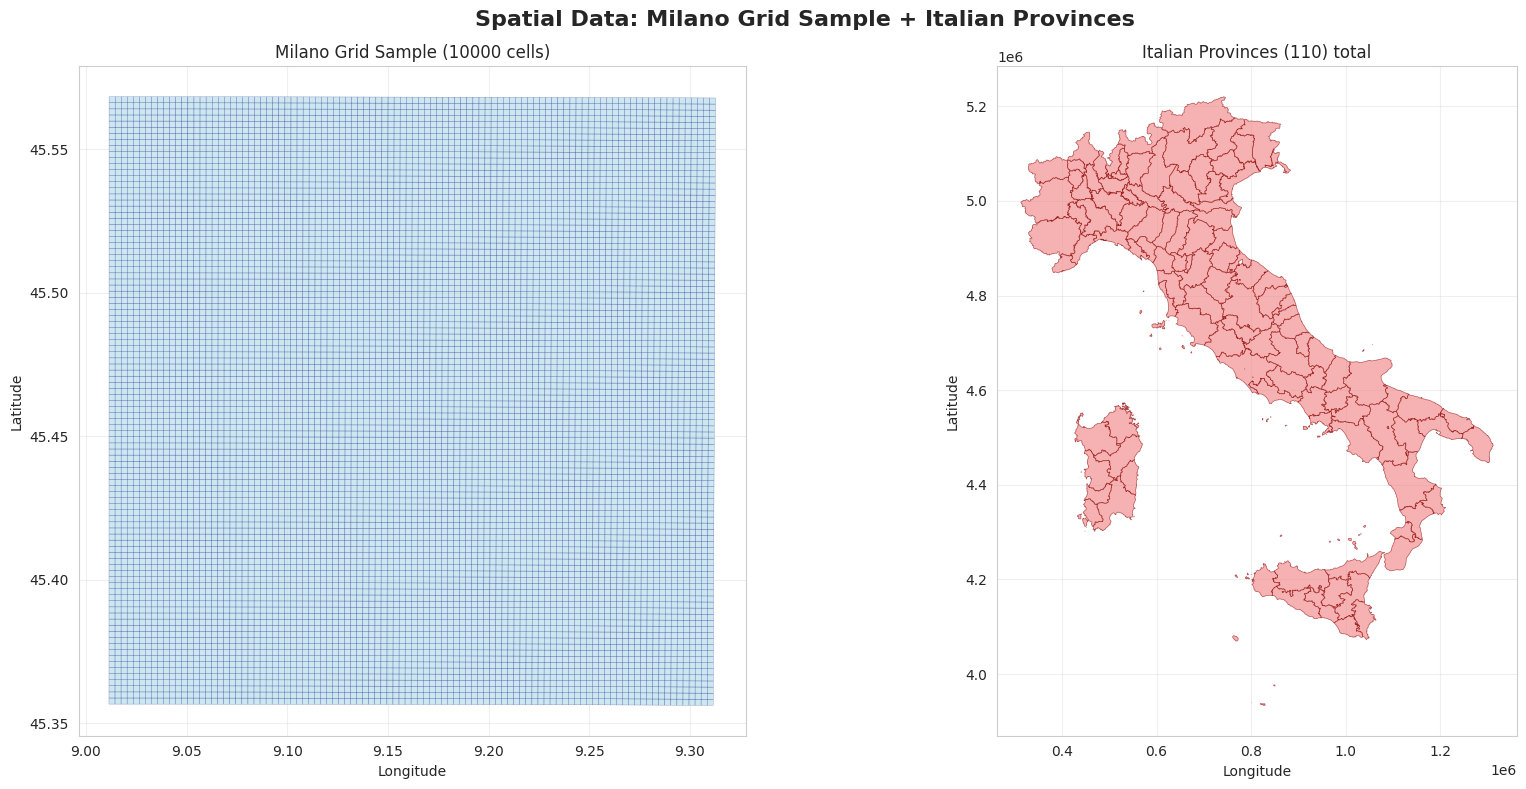

In [56]:
# Visualize Milano grid sample and Italian provinces
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Spatial Data: Milano Grid Sample + Italian Provinces', fontsize=16, fontweight='bold')

# Plot Milano grid sample (first 1000 cells for visualization)
milanogrid_sample.plot(ax=axes[0], color='lightblue', edgecolor='navy', linewidth=0.2, alpha=0.6)
axes[0].set_title(f'Milano Grid Sample ({len(milanogrid_sample)} cells)', fontsize=12)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].grid(True, alpha=0.3)

# Plot Italian provinces
provinces_gdf.plot(ax=axes[1], color='lightcoral', edgecolor='darkred', linewidth=0.5, alpha=0.6)
axes[1].set_title(f'Italian Provinces ({len(provinces_gdf)}) total', fontsize=12)
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


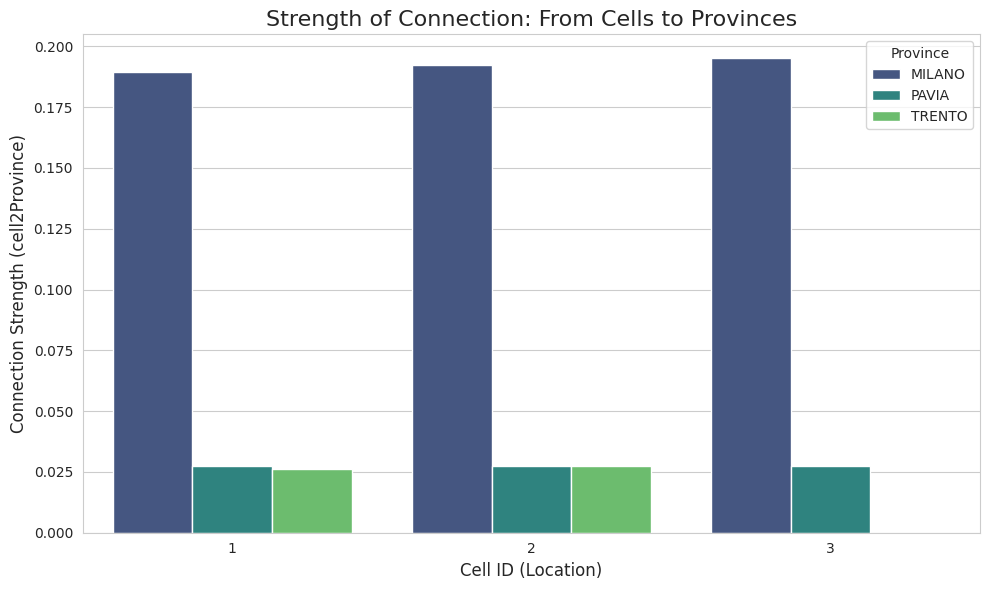

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

data = """datetime,CellID,provinceName,cell2Province,Province2cell
2013-11-01 00:00:00,1,MILANO,0.1894,0.0541
2013-11-01 00:00:00,1,PAVIA,0.0273,
2013-11-01 00:00:00,1,TRENTO,0.0261,
2013-11-01 00:00:00,2,MILANO,0.1922,0.0556
2013-11-01 00:00:00,2,PAVIA,0.0273,
2013-11-01 00:00:00,2,TRENTO,0.0274,
2013-11-01 00:00:00,3,MILANO,0.1952,0.0573
2013-11-01 00:00:00,3,PAVIA,0.0273,
"""

df = pd.read_csv(StringIO(data))

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

chart = sns.barplot(
    data=df, 
    x='CellID', 
    y='cell2Province', 
    hue='provinceName', 
    palette='viridis'
)

plt.title('Strength of Connection: From Cells to Provinces', fontsize=16)
plt.xlabel('Cell ID (Location)', fontsize=12)
plt.ylabel('Connection Strength (cell2Province)', fontsize=12)
plt.legend(title='Province')

plt.tight_layout()
plt.show()